# Assignment 2 - Machine Learning Basics

## Nathan Inkawhich
Netid:  nai2

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**(a)**

Because the sample size is so large, a **flexible** model would be better as it would allow you to better capture the true distribution of the data with lesser risk of overfitting on a small training (sample) set. In other words, the extremely large sample size is taken to be a close representation of the population, so the risk of overfitting to a small sample and not generalizing well is voided.

**(b)**

Since the number of observations is small, an **inflexible** method would be better because a flexible model would be prone to overfitting the small amount of training data. Either way, this is a particularly dangerous case as the curse of dimensionality becomes an issue.

**(c)**

We would prefer a **flexible** model as an inflexible model would be better for a more linear type of relationship. The flexible model will allow us to limit the bias error from estimating a complex relationship with a simplistic model.

**(d)**

We would prefer an **inflexible** model because a flexible model would be apt to overfit the data and try to model the noise rather than trying to learn the overall trend of the data.


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)**

*i.* This is a regression problem as we will be looking for quantitive values.

*ii.* Inference

*iii.* n = 500 ; p = 4

**(b)**

*i.* This is a classification problem as our output is two discrete values, success or failure.

*ii.* Prediction

*iii.* n = 20 ; p = 14

**(c)**

*i.* This is a regression problem as we will be looking for quantitive values.

*ii.* Prediction

*iii.* n = 52 (# weeks/year) ; p = 4

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [3]:
# (a) Write your own kNN classifier
import numpy as np
import pandas as pd
import time

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        # Constructor initializes empty lists which will store the training data
        #   and labels of the knn object
        # train_data is a list of lists where each list contains the features for 
        #   one observation and the label is appended to the end of the list. For
        #   example, for the low dimensional data with 2 features, each list would
        #   be length three, where the first 2 indexes are the features and the last
        #   index is the ground truth label.
        self.train_data = []
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        # Each entry of training data looks like this: [f_1, f_2, ..., f_n, y]
        #   Where the features of an observation (f_i) are the first part of the 
        #   array and the true label is in the last index
        
        # Wipe out whatever was here before
        self.train_data = []
        assert(len(x) == len(y))
        # Add the new data
        for i,dat in enumerate(x):
            dat.append(y[i])
            #print "Adding Sample: {}".format(dat)
            self.train_data.append(dat)
            
    # Helper function to print the training data that is currently loaded into the model
    def print_train_data(self):
        for i in range(len(self.train_data)):
            dat = self.train_data[i]
    
    # Function to calculate the euclidean distance between two vectors
    # The input vectors p1 and p2 should contain only features, NO labels
    def distance_fxn(self, p1, p2):
        assert(len(p1) == len(p2))
        dist = np.linalg.norm(np.array(p1)-np.array(p2))
        return dist
    
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        
        # Idea: Calculate the distance from each vector in x to the training data
        
        # For each sample in the test set x 
        for data in x:
            
            # New list to store the training data with the distance results
            # Each entry in this list will be a label distance pair: [label, distance]
            labels_and_distances = []
            
            # Calculate the distance to each of the training data points
            for i in self.train_data:
                dist = self.distance_fxn( i[:-1], data)
                #print "Distance({},{}) = {}".format(data,i[:-1],dist)
                labels_and_distances.append([i[-1], dist])
            
            # Now, we have calculated the distance between every training sample and the data point
            #    so we can sort the labels and distances array based on the distances
            labels_and_distances.sort(key=lambda x : x[1])
            
            # Extract the k closest points based on distance
            top_k = labels_and_distances[:k]
            
            # For each of the k closest, count the occurrences of each label
            cnts = np.zeros(2)
            for val in top_k:
                if val[0] == 0:
                    cnts[0] += 1
                else:
                    cnts[1] += 1
                    
            # The guess for this point is the class that appeared the most in the top_k list
            y_hat.append(np.argmax(cnts))
                
        # Return the estimated labels for all samples in the input test set (x)
        return y_hat


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / float(nvalues)
    return accuracy

# Read the csv file of features and return it in list of lists form
def parse_features(ifile):
    features = []
    f = open(ifile, "rb")
    for line in f:
        arr = line.split(",")
        tmp_feature_vector = []
        for ft in arr:
            tmp_feature_vector.append(float(ft))
        features.append(tmp_feature_vector)
        
    return features
    
# Create list of labels from csv file
def parse_labels(ifile):
    labels = []
    f = open(ifile, "rb")
    for line in f:
        labels.append(float(line))
        
    return labels

In [4]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

# Parse the input data into lists
x_low_train = parse_features("./data/A1_X_train_low.csv")
y_low_train = parse_labels("./data/A1_y_train_low.csv")
x_low_test = parse_features("./data/A1_X_test_low.csv")
y_low_test = parse_labels("./data/A1_y_test_low.csv")

x_high_train = parse_features("./data/A1_X_train_high.csv")
y_high_train = parse_labels("./data/A1_y_train_high.csv")
x_high_test = parse_features("./data/A1_X_test_high.csv")
y_high_test = parse_labels("./data/A1_y_test_high.csv")

# Construct the knn 
knn_low = Knn()
knn_high = Knn()

# "Train" the model (i.e load the features of the training samples and the index aligned labels)
knn_low.fit(x_low_train, y_low_train)
knn_high.fit(x_high_train, y_high_train)

# Run the prediction on the test samples with k=5
t1 = time.time()
y_hat_low = knn_low.predict(x_low_test,5)
t2 = time.time()
y_hat_high = knn_high.predict(x_high_test,5)
t3 = time.time()

# Print the results
print "(C)"
print "Low Dimensionality Test Results:"
print "\taccuracy = ",accuracy(np.array(y_low_test), np.array(y_hat_low))
print "\tTotal Time [s] = ",(t2-t1)
print "\tTime per prediction [s] = ",(t2-t1)/len(y_hat_low)

print "High Dimensionality Test Results:"
print "\taccuracy = ",accuracy(np.array(y_high_test), np.array(y_hat_high))
print "\tTotal Time [s] = ",(t3-t2)
print "\tTime per prediction [s] = ",(t3-t2)/len(y_hat_high)

(C)
Low Dimensionality Test Results:
	accuracy =  0.925
	Total Time [s] =  9.49577999115
	Time per prediction [s] =  0.00949577999115
High Dimensionality Test Results:
	accuracy =  0.993
	Total Time [s] =  20.4640991688
	Time per prediction [s] =  0.0204640991688


In [5]:
# Check our results with the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Reparse inputs because they may have been altered by previous process
x_low_train = parse_features("./data/A1_X_train_low.csv")
y_low_train = parse_labels("./data/A1_y_train_low.csv")
x_low_test = parse_features("./data/A1_X_test_low.csv")
y_low_test = parse_labels("./data/A1_y_test_low.csv")

x_high_train = parse_features("./data/A1_X_train_high.csv")
y_high_train = parse_labels("./data/A1_y_train_high.csv")
x_high_test = parse_features("./data/A1_X_test_high.csv")
y_high_test = parse_labels("./data/A1_y_test_high.csv")

# Create KNN for low dimensional data set and 'train' it
#   Using brute force algo for a better comparison to ours as implemented above
neigh_low = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
neigh_low.fit(np.array(x_low_train), y_low_train )

# Create KNN for high dimensional data set and 'train' it
neigh_high = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
neigh_high.fit(np.array(x_high_train), y_high_train )

# Test the knns on their respective test sets
t4 = time.time()
neigh_low_yhat = neigh_low.predict( np.array(x_low_test) )
t5 = time.time()
neigh_high_yhat = neigh_high.predict( np.array(x_high_test) )
t6 = time.time()

# Report accuracy and time results
# Accuracy results should be the same as the results from our implementation
print "(D)"
print "Low Dimensionality Test Results:"
print "\tsklearn.KNeighborsClassifier accuracy = ",accuracy(np.array(y_low_test), np.array(neigh_low_yhat))
print "\tsklearn.KNeighborsClassifier Total Time = ",(t5-t4)
print "\tsklearn.KNeighborsClassifier Time per prediction = ",(t5-t4)/len(neigh_low_yhat)

print "High Dimensionality Test Results:"
print "\tsklearn.KNeighborsClassifier accuracy = ",accuracy(np.array(y_high_test), np.array(neigh_high_yhat))
print "\tsklearn.KNeighborsClassifier Total Time = ",(t6-t5)
print "\tsklearn.KNeighborsClassifier Time per prediction = ",(t6-t5)/len(neigh_high_yhat)



(D)
Low Dimensionality Test Results:
	sklearn.KNeighborsClassifier accuracy =  0.925
	sklearn.KNeighborsClassifier Total Time =  0.0257208347321
	sklearn.KNeighborsClassifier Time per prediction =  2.57208347321e-05
High Dimensionality Test Results:
	sklearn.KNeighborsClassifier accuracy =  0.993
	sklearn.KNeighborsClassifier Total Time =  0.0231399536133
	sklearn.KNeighborsClassifier Time per prediction =  2.31399536133e-05


**ANSWER**:

**(d)**

Comparison of results: 

As a result of training and testing four knn classifiers, two of which we implemented here and two of which are from sklearn python package, we see that our accuracy results are the same, indicating that both versions function the same.  However, the sklearn version has a **significant** speed advantage over our implementation, even when using the non-optimized brute force approach.

**(e)**

The problem arrives of the prediction process being slow when you try to acutally use the system and incorporate it as a part of another larger system. In general, it is ok if the process is slow in the lab, but it is critical that the prediction be fast when deployed. Ideally, the classifier would not be the bottleneck of the overall system. Also, when the prediction process is slow, it is very hard to tackle real world problems like real time classification, live video segmentation, etc.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [6]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

# Define the test point
test_x = np.array([0,0,0])

# Compute Euclidean distance between each point and test point
for xi in X:
    assert(len(test_x) == len(xi))
    dist = np.linalg.norm(test_x - xi)
    print "Dist({}, {}) = {}".format(test_x, xi, dist)


Dist([0 0 0], [0 3 0]) = 3.0
Dist([0 0 0], [2 0 0]) = 2.0
Dist([0 0 0], [0 1 3]) = 3.16227766017
Dist([0 0 0], [0 1 2]) = 2.2360679775
Dist([0 0 0], [-1  0  1]) = 1.41421356237
Dist([0 0 0], [1 1 1]) = 1.73205080757


**ANSWER**:

**(a)**

*Table 2. Similar to Table 1 but with an additonal column to show the Euclidean distance to the test sample [0 0 0]*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |$Distance$ |
|------|-------|-------|-------|-------|-----------|
| **1**| 0     | 3     | 0     | Red   | 3.0000    |
| **2**| 2     | 0     | 0     | Red   | 2.0000    |
| **3**| 0     | 1     | 3     | Red   | 3.1622    |
| **4**| 0     | 1     | 2     | Blue  | 2.2360    |
| **5**| -1    | 0     | 1     | Blue  | 1.4142    |
| **6**| 1     | 1     | 1     | Red   | 1.7320    |

**(b)**

Prediction when k=1 means we choose the class of the single training example that is the shortest distance away from our test case.  From the results of (a), the test point is closest to training sample [-1 0 1] which is of class Blue, therefore we predict **Blue**.

**(c)**

Prediction when k=3 means we first look at the three closes points. In this case the three closest are [-1 0 1], [1 1 1], and [2 0 0]. Since [1 1 1] and [2 0 0] are both Red, we choose **Red** because the probability is 2/3, whereas there is a 1/3 probability of Blue.

**(d)** 

If the Bayes decision boundary is highly non-linear, that would mean we would need a flexible model to reduce the bias error. For KNN's, a flexible model generally means lower values of k, therefore we would choose a small value for k.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

(B)


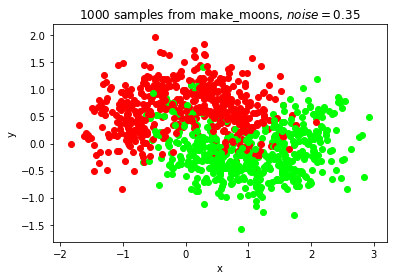

(D)


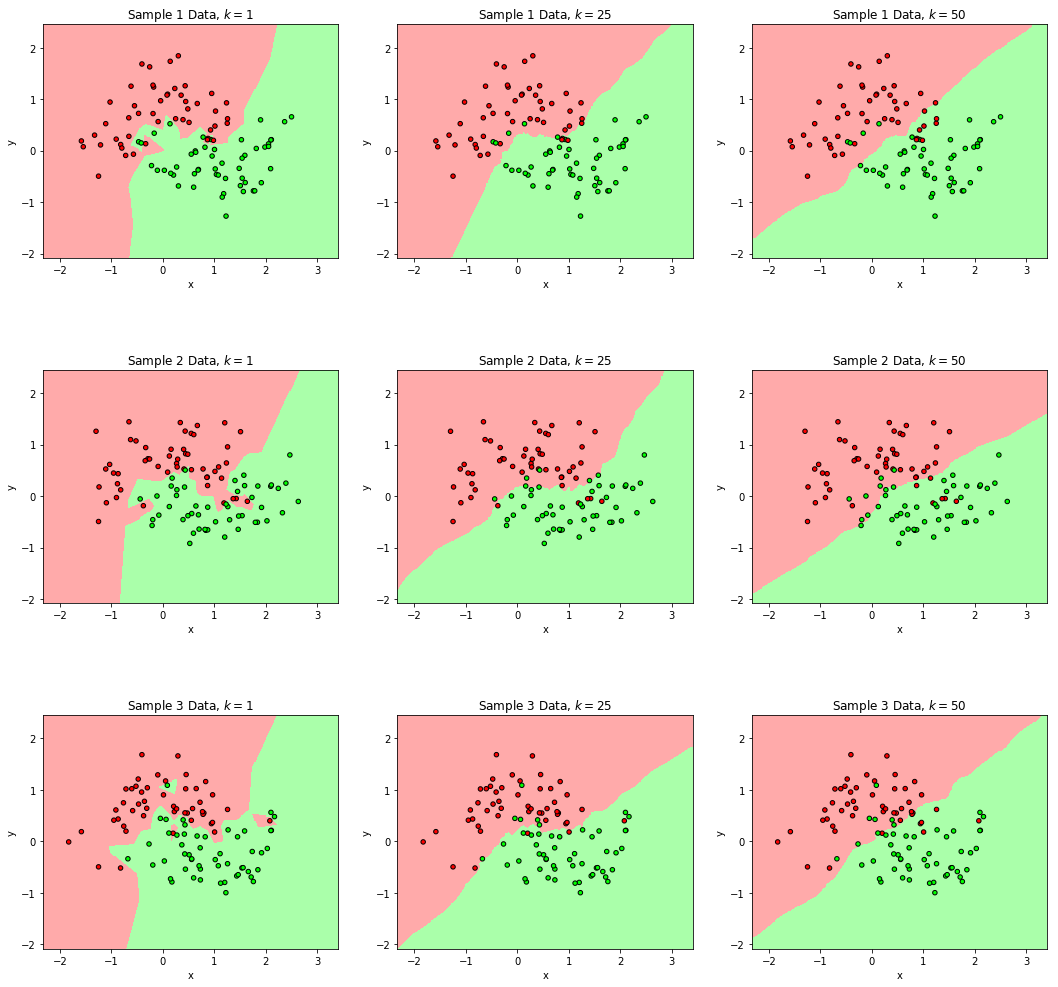

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
import random
from matplotlib.colors import ListedColormap

N=1000

# (A)
moon_data = make_moons(n_samples=N, noise=.35)

moon_samples = moon_data[0]
moon_labels = moon_data[1]

# (B)
print "(B)"
colors=['#FF0000', '#00FF00']
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(moon_samples)):
    ax.scatter(moon_samples[i][0], moon_samples[i][1], color=colors[moon_labels[i]])
plt.title("1000 samples from make_moons, $noise=0.35$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# (C)

# Generate 3 sets of 100 randomly sampled indexes
sample1_indexes = random.sample(range(1, N), 100)
sample2_indexes = random.sample(range(1, N), 100)
sample3_indexes = random.sample(range(1, N), 100)

# From the indexes, extract the corresponding features and labels
moon_samples1 = [moon_samples[i] for i in sample1_indexes]
moon_labels1 = [moon_labels[i] for i in sample1_indexes]

moon_samples2 = [moon_samples[i] for i in sample2_indexes]
moon_labels2 = [moon_labels[i] for i in sample2_indexes]

moon_samples3 = [moon_samples[i] for i in sample3_indexes]
moon_labels3 = [moon_labels[i] for i in sample3_indexes]

# (D)

h = .02 # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Define the meshgrid for the entire sample
# This will be used to display decision boundaries
x_min, x_max = moon_samples[:,0].min() - .5, moon_samples[:,0].max() + .5
y_min, y_max = moon_samples[:,1].min() - .5, moon_samples[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Knns for subset 1
# Build, train, and predict with the three KNNS for the sample 1 data. 
#   The difference between the knn's is the k value.
knn_subset1_k1 = KNeighborsClassifier(n_neighbors=1)
knn_subset1_k1.fit(moon_samples1,  moon_labels1)
Z_s1_k1 = knn_subset1_k1.predict(np.c_[xx.ravel(), yy.ravel()])

knn_subset1_k5 = KNeighborsClassifier(n_neighbors=25)
knn_subset1_k5.fit(moon_samples1,  moon_labels1)
Z_s1_k5 = knn_subset1_k5.predict(np.c_[xx.ravel(), yy.ravel()])

knn_subset1_k25 = KNeighborsClassifier(n_neighbors=50)
knn_subset1_k25.fit(moon_samples1,  moon_labels1)
Z_s1_k25 = knn_subset1_k25.predict(np.c_[xx.ravel(), yy.ravel()])

# Knns for subset 2
# Build, train, and predict with the three KNNS for the sample 2 data.
knn_subset2_k1 = KNeighborsClassifier(n_neighbors=1)
knn_subset2_k1.fit(moon_samples2,  moon_labels2)
Z_s2_k1 = knn_subset2_k1.predict(np.c_[xx.ravel(), yy.ravel()])

knn_subset2_k5 = KNeighborsClassifier(n_neighbors=25)
knn_subset2_k5.fit(moon_samples2,  moon_labels2)
Z_s2_k5 = knn_subset2_k5.predict(np.c_[xx.ravel(), yy.ravel()])

knn_subset2_k25 = KNeighborsClassifier(n_neighbors=50)
knn_subset2_k25.fit(moon_samples2,  moon_labels2)
Z_s2_k25 = knn_subset2_k25.predict(np.c_[xx.ravel(), yy.ravel()])

# Knns for subset 3
# Build, train, and predict with the three KNNS for the sample 3 data.
knn_subset3_k1 = KNeighborsClassifier(n_neighbors=1)
knn_subset3_k1.fit(moon_samples3,  moon_labels3)
Z_s3_k1 = knn_subset3_k1.predict(np.c_[xx.ravel(), yy.ravel()])

knn_subset3_k5 = KNeighborsClassifier(n_neighbors=25)
knn_subset3_k5.fit(moon_samples3,  moon_labels3)
Z_s3_k5 = knn_subset3_k5.predict(np.c_[xx.ravel(), yy.ravel()])

knn_subset3_k25 = KNeighborsClassifier(n_neighbors=50)
knn_subset3_k25.fit(moon_samples3,  moon_labels3)
Z_s3_k25 = knn_subset3_k25.predict(np.c_[xx.ravel(), yy.ravel()])


# Reshape the results back to 2D
Z_s1_k1 = Z_s1_k1.reshape(xx.shape)
Z_s1_k5 = Z_s1_k5.reshape(xx.shape)
Z_s1_k25 = Z_s1_k25.reshape(xx.shape)

Z_s2_k1 = Z_s2_k1.reshape(xx.shape)
Z_s2_k5 = Z_s2_k5.reshape(xx.shape)
Z_s2_k25 = Z_s2_k25.reshape(xx.shape)

Z_s3_k1 = Z_s3_k1.reshape(xx.shape)
Z_s3_k5 = Z_s3_k5.reshape(xx.shape)
Z_s3_k25 = Z_s3_k25.reshape(xx.shape)


# Put the result into a color plot
print "(D)"
plt.figure(figsize=(18,18))

## SAMPLE 1 PLOTS
plt.subplot(3,3,1,aspect='equal')
plt.pcolormesh(xx, yy, Z_s1_k1,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples1], [x[1] for x in moon_samples1], c=moon_labels1, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 1 Data, $k=1$")

plt.subplot(3,3,2,aspect='equal')
plt.pcolormesh(xx, yy, Z_s1_k5,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples1], [x[1] for x in moon_samples1], c=moon_labels1, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 1 Data, $k=25$")

plt.subplot(3,3,3,aspect='equal')
plt.pcolormesh(xx, yy, Z_s1_k25,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples1], [x[1] for x in moon_samples1], c=moon_labels1, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 1 Data, $k=50$")

## SAMPLE 2 PLOTS
plt.subplot(3,3,4,aspect='equal')
plt.pcolormesh(xx, yy, Z_s2_k1,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples2], [x[1] for x in moon_samples2], c=moon_labels2, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 2 Data, $k=1$")

plt.subplot(3,3,5,aspect='equal')
plt.pcolormesh(xx, yy, Z_s2_k5,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples2], [x[1] for x in moon_samples2], c=moon_labels2, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 2 Data, $k=25$")

plt.subplot(3,3,6,aspect='equal')
plt.pcolormesh(xx, yy, Z_s2_k25,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples2], [x[1] for x in moon_samples2], c=moon_labels2, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 2 Data, $k=50$")

## SAMPLE 3 PLOTS
plt.subplot(3,3,7,aspect='equal')
plt.pcolormesh(xx, yy, Z_s3_k1,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples3], [x[1] for x in moon_samples3], c=moon_labels3, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 3 Data, $k=1$")

plt.subplot(3,3,8,aspect='equal')
plt.pcolormesh(xx, yy, Z_s3_k5,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples3], [x[1] for x in moon_samples3], c=moon_labels3, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 3 Data, $k=25$")

plt.subplot(3,3,9,aspect='equal')
plt.pcolormesh(xx, yy, Z_s3_k25,cmap=cmap_light)
plt.scatter([x[0] for x in moon_samples3], [x[1] for x in moon_samples3], c=moon_labels3, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample 3 Data, $k=50$")

plt.show()



**ANSWER**

**(e)** 

From the 3x3 grid above we can make some observations. First, we notice that as k increases from 1 to 25 to 50 across the rows, the decision boundary becomes less erratic and more linear. More specifically, in the k=1 plots, the decision boundary has many irregularities and is highly non-linear. However, in the k=50 plots, the decision bounary is much more linear in nature and hardly changes as the sample data changes. Secondly, we notice that as we look down the columns, even though the sample data is different for each row, the general characteristics of the decision boundaries are the same. In terms of pure accuracy, the k=1 classifiers appear to work the best on the training data, however this is to be expected as k=1 means zero error on the training set. The issue with k=1 is that it overfits the training data so it does not generalize well to new data. The k=50 classifiers appear to over generalize the decision boundary, which leads to high error, while the k=25 appears to give a better tradeoff between train accuracy and generalization, and thus best separates the classes. Overall, the k=1 decision boundary varies the most as the data changes (high variance), the k=25 boundary is a better tradeoff between flexibility and generalization, and the k=50 boundary has excessive bias error.

**(f)** 

The bias variance tradeoff stems from the desire to minimize both the bias and the variance of a model, as both are factors in the overall error equation. From the book, the variance is how much the decision boundary changes as a result of a change in the training dataset, and the bias is the error introduced by modeling a complex system with an overly simplistic model. The trend of the tradeoff is that as model flexibility increases, the bias decreases and the variance increases. 

From the plots made in this exercise we can immediately see how variance effects the model when k=1. Notice the decision boundaries for the k=1 plots are very different from eachother, which is a result of the changing the training data. For the k=1 plots, we say the model has high variance and relatively low bias. For the k=50 plots, the decision boundary does not change alot as a result of changing the training data however the error is higher. Therefore, the k=50 model has low variability but high bias. The k=25 model is a tradeoff of the two extremes. The error on the data is not zero and the model's decision boundary changes moderately with the changing training data. This version (k=25) has higher variance than the k=50 model and higher bias than the k=1 model.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

(B)


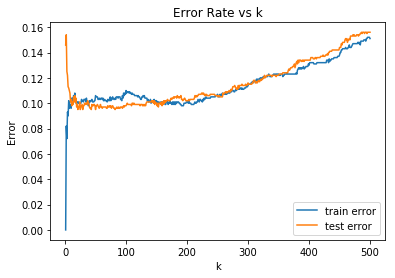

In [5]:
## (A) - Create test dataset
# Rename data from previous section to train data
train_features = moon_samples
train_labels = moon_labels

# Create test data with make moons
test_set = make_moons(n_samples=1000, noise=.35)
test_features = test_set[0]
test_labels = test_set[1]

train_error = []
test_error = []

## (B) - train a knn on training set for k = 1:100
for k in range(1,501):
    
    # Construct a KNN obj with appropriate k
    tmp_knn = KNeighborsClassifier(n_neighbors=k)
    tmp_knn.fit(train_features, train_labels)
    
    # Run predictions on train data
    knn_out_train = tmp_knn.predict(train_features)
    
    # Run predictions on test data
    knn_out_test = tmp_knn.predict(test_features)
    
    # Compute the error on the training and testing sets (error = 1 - accuracy)
    train_err = 1 - accuracy(train_labels, knn_out_train)
    test_err = 1 - accuracy(test_labels, knn_out_test)
    
    #print "k = {}, train err = {}, test err = {}".format(k, train_err, test_err)
    
    # Add the error measurements to the lists
    train_error.append(train_err)
    test_error.append(test_err)
    
#plt.figure(figsize=(10,10))
print "(B)"
plt.plot(range(1,501) ,train_error)
plt.plot(range(1,501), test_error)
plt.legend(["train error","test error"])
plt.title("Error Rate vs k")
plt.xlabel("k")
plt.ylabel("Error")
plt.show()

**(c)**

From the results, we see that there are three major intervals of interest in this figure, namely [0,50], [50,150], and [150,500]. In the first interval we see that the training error increases very rapidly as k increases. This is as expected because the training error when $k=1$ is zero due to overfitting, and it can only increase from there. We also see that the test error decreases rapidly from its initial value as k increases which is also as expected because at very low k values the model would be overfit to the training data and have poor test performance, but as k increases the model is better generalized.

In the [50,150] interval we see that the test error and training error are about the same and the error is not increasing as k increases. This indicates that the optimal value for k, in terms of the bias-variance tradeoff, falls in this range as the generalization performance is good.

In the [150,500] interval, we see that both the test and train error are increasing together as k increases. This indicates that k is overgeneralizing and there is high bias in this region.

**(d)**

High values of k represent a high bias and low values of k represent a high variance.

**(e)**

Because the make moons data is random, every time we run the above module the plot changes slightly but it seems the optimal value of k is about 50, where the train error and test error converge, indicating good generalization performance.

**(f)**

In a linear model, the number of coefficients of the model can control the flexibility. In neural networks, the number of neurons in the hidden layers and the depth of the network is a way to control flexibility. In general, the number of parameters that can be tuned for a model is what controls flexibility.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [9]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

(A)


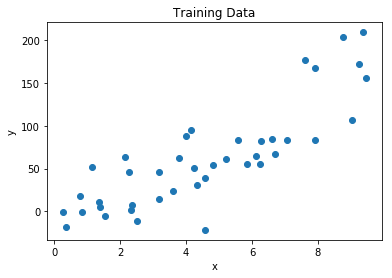

(B)
	Coefficients: a_1 = 18.3032068477 ; a_0 = -21.7307829291
	Equation: y = -21.7307829291 + 18.3032068477 * x
	As measured on training data
		MSE: 1052.58536625
		R^2: 0.701459091381
(C)
	Coefficients: a_2 = 1.83208190974 ; a_1 = 0.471006860439 ; a_0 = 8.00733746159
	Equation: y = 8.00733746159 + 0.471006860439 * x + 1.83208190974 * x^2
	As measured on training data
		MSE: 884.797759661
		R^2: 0.749048071935
(D)


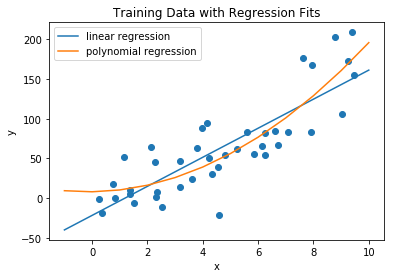

(E)
Testing Results

Linear Regression
	MSE: 2023.31210889
	R^2: 0.555646588579

Polynomial Regression
	MSE: 1398.88175801
	R^2: 0.692782008956


In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## (A) - Scatter plot of training data
print "(A)"
plt.scatter(x_train,y_train)
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Create linear regression object
regr = linear_model.LinearRegression(copy_X=True)

# Train the model using x_train
regr.fit(np.array(x_train).reshape(-1,1), y_train)

# Make predictions on the training set
y_pred_train = regr.predict(np.array(x_train).reshape(-1,1))

a_1 = float(regr.coef_[0])
a_0 = float(regr.intercept_)

print "(B)"
print "\tCoefficients: a_1 = {} ; a_0 = {}".format(a_1, a_0)
print "\tEquation: y = {} + {} * x".format(a_0, a_1)
print "\tAs measured on training data"
print "\t\tMSE: {}".format(mean_squared_error(y_train, y_pred_train)) 
print "\t\tR^2: {}".format(r2_score(y_train, y_pred_train))


x = np.array(range(-1,11))
y = a_1 * x + a_0

regr2 = linear_model.LinearRegression(copy_X=True)
regr2.fit(np.hstack((np.array(x_train).reshape(-1,1),np.array(x_train).reshape(-1,1)**2)), y_train)

# Make predictions on the training set
y2_pred_train = regr2.predict(np.hstack((np.array(x_train).reshape(-1,1),np.array(x_train).reshape(-1,1)**2)))

a2_2 = float(regr2.coef_[1])
a2_1 = float(regr2.coef_[0])
a2_0 = float(regr2.intercept_)
x2 = np.array(range(-1,11))
y2 = a2_2*x2**2 + a2_1 * x2 + a2_0

print "(C)"
print "\tCoefficients: a_2 = {} ; a_1 = {} ; a_0 = {}".format(a2_2, a2_1, a2_0)
print "\tEquation: y = {} + {} * x + {} * x^2".format(a2_0, a2_1, a2_2)
print "\tAs measured on training data"
print "\t\tMSE: {}".format(mean_squared_error(y_train, y2_pred_train)) 
print "\t\tR^2: {}".format(r2_score(y_train, y2_pred_train))

print "(D)"
plt.scatter(x_train,y_train)
plt.plot(x,y, label="linear regression")
plt.plot(x2,y2, label="polynomial regression")
plt.title("Training Data with Regression Fits")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print "(E)"
# Make predictions on the test set
y_pred_test = regr.predict(np.array(x_test).reshape(-1,1))
y2_pred_test = regr2.predict(np.hstack((np.array(x_test).reshape(-1,1),np.array(x_test).reshape(-1,1)**2)))

print "Testing Results"
print "\nLinear Regression"
print "\tMSE: {}".format(mean_squared_error(y_test, y_pred_test)) 
print "\tR^2: {}".format(r2_score(y_test, y_pred_test))
print "\nPolynomial Regression"
print "\tMSE: {}".format(mean_squared_error(y_test, y2_pred_test)) 
print "\tR^2: {}".format(r2_score(y_test, y2_pred_test))

**(f)**

The second order polynomial regression model performs better on both the training and testing data (i.e. it has lower MSE and higher $R^2$ values in both training and testing). This is because the the samples exhibit a non linear relationship that can be better modeled with a second order polynomial.

**(g)**

If the test data were significantly different than the training data it could affect the capability in either a positive or negative way. If we got lucky, it would be positive, however chances are the predictive capability would be degraded. This is somewhat of an obvious result as we specifically train the model from samples of a particular distribution. If the distribution of the test data changes a lot, or model will not perform well.